In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

              1M    3M   6M   1Y    2Y    3Y    5Y    7Y   10Y   20Y   30Y
Date                                                                      
2006-02-10  4.36  4.53  4.7  4.7  4.69  4.67  4.59  4.59  4.59  4.76  4.55
              1M    3M    6M    1Y    2Y    3Y    5Y   7Y   10Y   20Y   30Y
Date                                                                       
2017-01-26  0.49  0.51  0.62  0.82  1.21  1.49  1.95  2.3  2.51  2.82  3.08


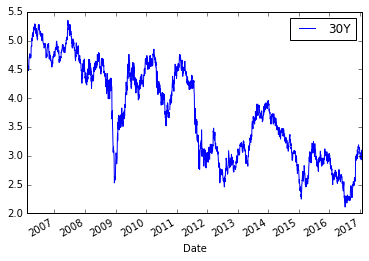

In [2]:
xl = pd.ExcelFile('/Users/edith/Python/Academia/CMT-all.xlsx')
df=xl.parse('Sheet1')
df = df.set_index('Date')
d1 = '2006-02-09'
df = df[df.index > d1]
print (df.head(1))
print (df.tail(1))
df['30Y'].plot()
plt.legend(loc='best')

In [3]:
#compute a table with daily changes:
df_ret = df.diff(periods=1).dropna()
print (df_ret.head(2))
print (df_ret.tail(2))

              1M    3M    6M    1Y    2Y    3Y    5Y    7Y   10Y   20Y   30Y
Date                                                                        
2006-02-13  0.02  0.02  0.01  0.00 -0.01 -0.01 -0.01 -0.01 -0.01  0.00  0.01
2006-02-14  0.04  0.00  0.01  0.01  0.01  0.02  0.03  0.03  0.04  0.04  0.04
              1M    3M    6M    1Y    2Y    3Y    5Y    7Y   10Y   20Y   30Y
Date                                                                        
2017-01-25 -0.02 -0.01 -0.01  0.01  0.02  0.03  0.05  0.06  0.06  0.06  0.05
2017-01-26  0.01  0.01  0.01  0.00 -0.02 -0.03 -0.04 -0.03 -0.02 -0.02 -0.02


In [4]:
#df['30Y-10Y'] = df['30Y']-df['10Y']
#df['30Y-10Y'].plot()


In [5]:
#PCA:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pca.fit(df_ret)
f=pca.components_
var_ratio = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4))
print (var_ratio)

c = df_ret.cov()
val, vec = np.linalg.eig(c)
tr = sum(val)
print (np.cumsum(val/tr))


[ 0.6212  0.8542  0.9233  0.9632  0.9789  0.9876  0.9918  0.9951  0.9971
  0.9987  1.    ]
[ 0.62116461  0.85411719  0.92319059  0.96313161  0.97885811  0.98756662
  0.99174359  0.99505871  0.99632404  0.99837246  1.        ]


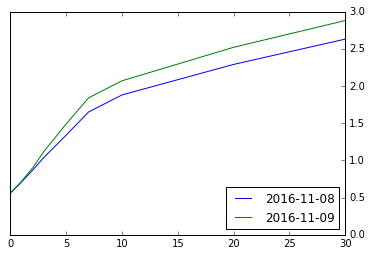

In [6]:
def plotme(dts,frame):
    f = plt.figure()
    ax = f.add_subplot(111)
    ax.yaxis.tick_right()
    x = [1/12,3/12,6/12,1,2,3,5,7,10,20,30]    
    crvs = [frame.loc[dt] for dt in dts]
    plots = [plt.plot(x,crv.values,label=dt) for crv,dt in zip(crvs,dts)]
    plt.legend(loc='lower right')    
    plt.show()
    
dts = ['2016-11-08', '2016-11-09']
plotme(dts,df)
#plotme([dts[1]],df_ret)
